

# Project: Investigate No show appointments data (May-2016)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
>● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
>● ‘Neighborhood’ indicates the
location of the hospital.
>● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
>● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up. 


### Question(s) for Analysis
> What factors are
important for us to
know in order to
predict if a patient will
show up for their
scheduled
appointment?

>1- whether patients with comorbidities were more likely to miss there schedualed dates

>2- Being handcapped or with Diabetes associated with less compliance

>3- Dose diffrent centers have effect on patient compliance  

>4- Dose receiving SMS affects the patient show on the schedualed examination date 

>5- Gender deffereance had an impact on patient compliance 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [2]:
df = pd.read_csv('noshowappointment-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
sum(df.duplicated())

0

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



>No duplicated data was detected and No missed data

>We have Data of (110527 Raws,and 14 Columns)

>The Info table above showed the five number summary values for some columns as Age 



### Data Cleaning

 

In [7]:
df.drop(['PatientId', 'AppointmentID'],axis = 1,inplace = True)


In [8]:
df.drop(['ScheduledDay', 'AppointmentDay'],axis = 1,inplace = True)

In [9]:
df.head()


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


><#I Excuded some columns (PatientID, AppointmentID and AppointmentDate) which in my openion will have no value in my anlysis,
<#there is no association between those information and the patient compliance
<#Now we Have Only 10 column to deal with.

In [10]:
df.rename(columns={'No-show':'No_show','Hipertension':'Hypertension'},inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> I renamed No-show to be "No_show" that will be less confusing to me

> I also renamed Hypertension column to correct a spelling mistake. 

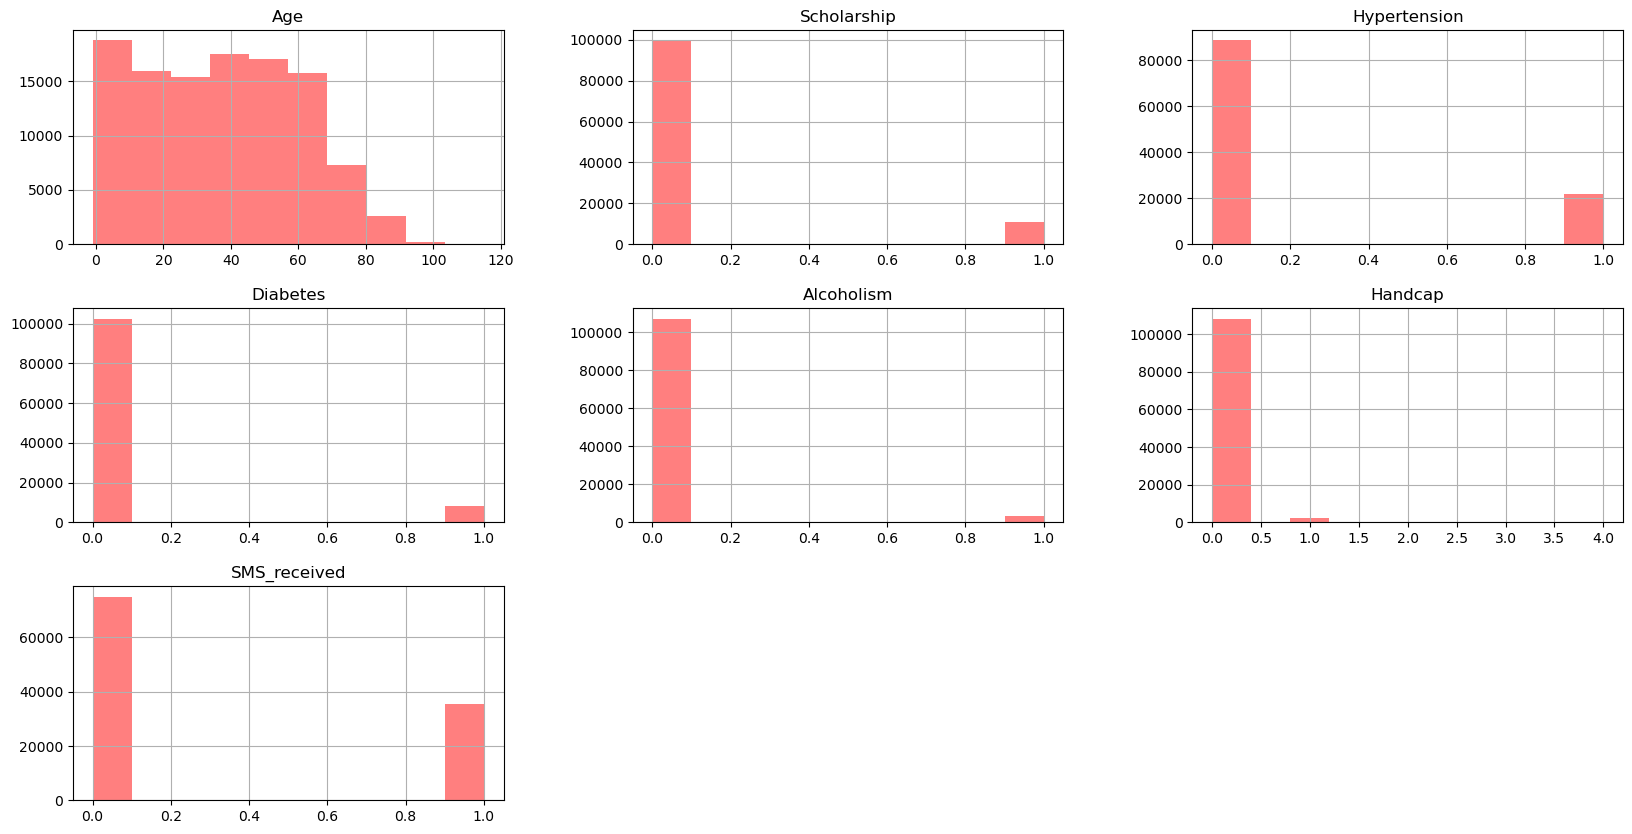

In [11]:
df.hist(alpha=0.5, color="Red" ,figsize=(20,10));

>#I'm showing a number of histogram presentation of our data, giving us a general idea of data distribution:
>#for example:

>1-Patients who have not received a SMS were more than who have
>2-The dominant age group was around 10 to 20 years, then whose age were between 30 and 50 
>3- the Non-diseased patients with (Diabetes, Hypertention and Handcapped) were more than the diseased. 

In [12]:
df['No_show'].value_counts()

No     88208
Yes    22319
Name: No_show, dtype: int64

>#About 20% of the patients didn't show (Were absecent) from there   scheduled appointments.

>#the below bar chart presenting the patients who showed at the (No labeled bar) and who didn't show as the Yes labeled barm

In [13]:
plt.style.use('bmh')

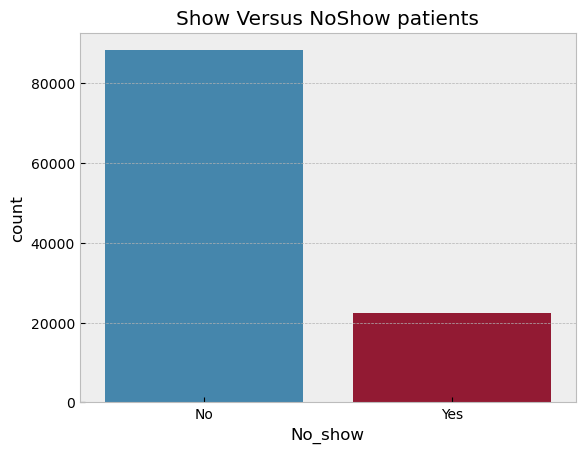

In [14]:
ax=sns.countplot(x=df.No_show,data=df)
ax.set_title('Show Versus NoShow patients')
plt.show()

In [15]:
df_absence = df[df['No_show']=='Yes']
df_absence.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
6,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,M,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,F,40,CONQUISTA,1,0,0,0,0,0,Yes
20,F,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


<#No_show=yes..  will be presented as df=absence
<#the below table presenting the data of the absent patient only extracted from the total data table 


In [16]:
mask=df['No_show']=='Yes'
df_absence=df[mask]
df_absence

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
6,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,M,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,F,40,CONQUISTA,1,0,0,0,0,0,Yes
20,F,30,NOVA PALESTINA,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...
110484,F,45,BARRO VERMELHO,0,0,0,0,0,0,Yes
110492,M,33,MARIA ORTIZ,0,1,0,0,0,0,Yes
110496,F,37,MARIA ORTIZ,0,1,0,0,0,0,Yes
110515,M,33,MARIA ORTIZ,0,1,0,0,0,0,Yes


In [17]:
df_absence['Age'].describe()

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

>#the five number summary of the absence grop of patients (No-show): the mean was 34.3 years old with 21 dtandard deviation 
>#the min age was zero and max was 115 years old 
>#a box-plot graphic presentation of the age of patients who were abscent 
>#we can see an outlier presenting the max age of 115 years old patient 

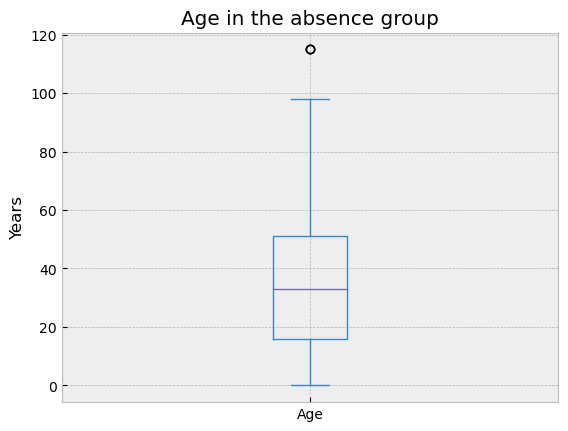

In [89]:
df_absence['Age'].plot(kind='box',title='Age in the absence group')
plt.ylabel('Years')
plt.show()

In [19]:
df_absence['Neighbourhood'].value_counts()

JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: Neighbourhood, Length: 80, dtype: int64

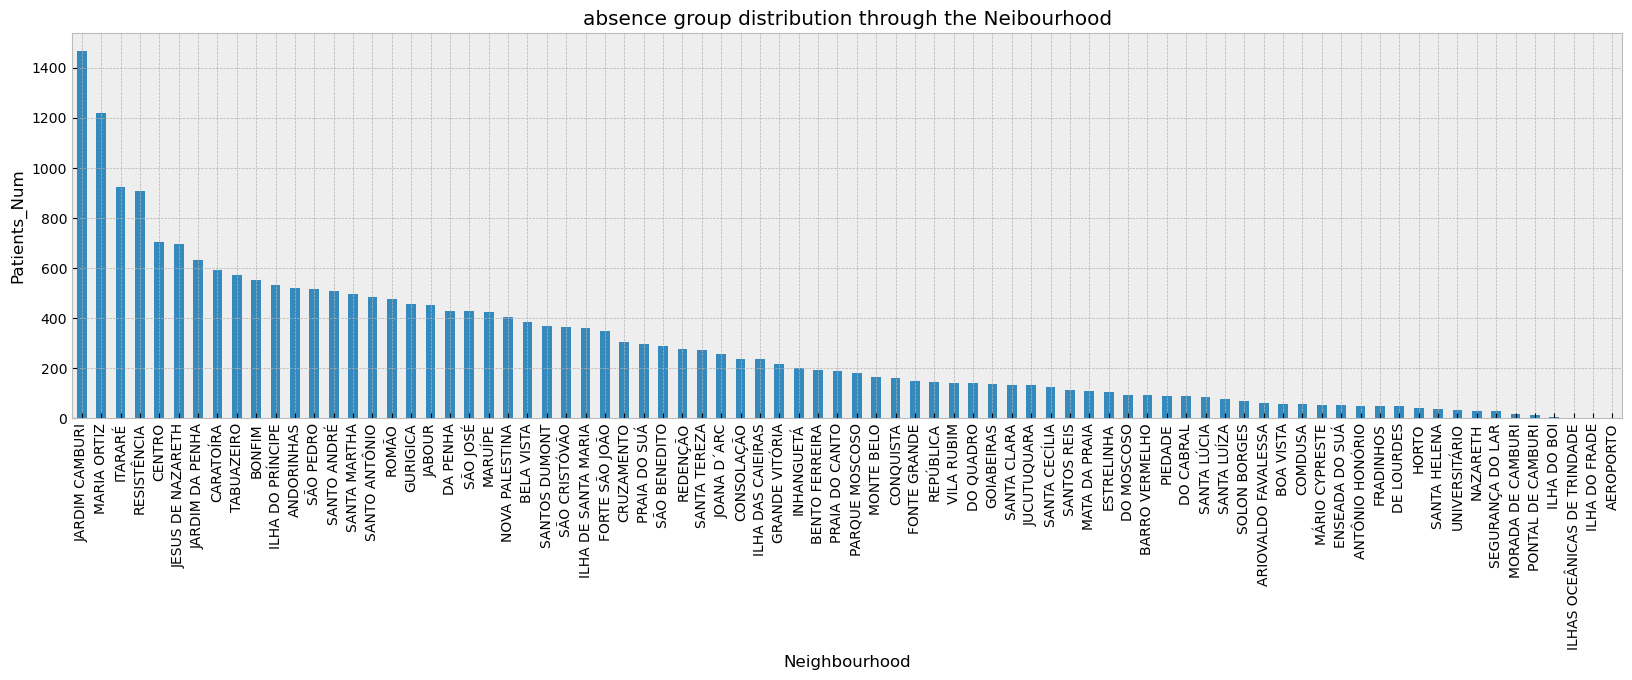

In [97]:
ind=df_absence['Neighbourhood'].value_counts().index

df_absence['Neighbourhood'].value_counts()[ind].plot(kind='bar',figsize=(20,5),title='absence group distribution through the Neibourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients_Num')
plt.show()

In [21]:
df_showed = df[df['No_show']=='No']

In [22]:
mask=df['No_show']=='No'
df_showed=df[mask]
df_showed

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [23]:
df_showed['Neighbourhood'].value_counts()


JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: Neighbourhood, Length: 80, dtype: int64

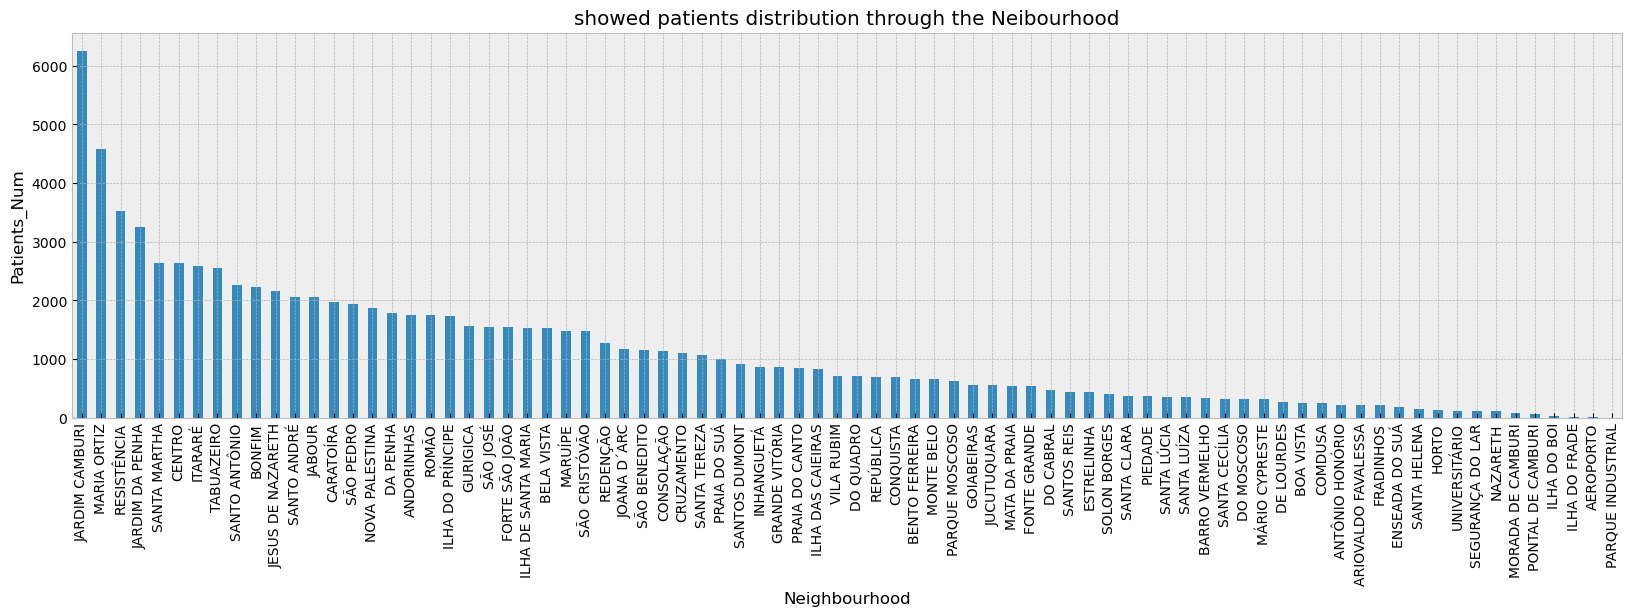

In [98]:

df_showed['Neighbourhood'].value_counts().plot(kind='bar',figsize=(20,5),title='showed patients distribution through the Neibourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients_Num')
plt.show()

>#the patients who were abcent versus who showed:
>#JARDIM CAMBURI & MARIA ORTIZ were thw most popular places for abcent group                
>#while ILHAS OCEÂNICAS DE TRINDADE and PARQUE INDUSTRIAL   were the least populr              
>#but in the abscence group: ILHAS OCEÂNICAS DE TRINDADE & ILHA DO FRADE and AEROPORTO were the least populat (so the least likely to have non complience patients) 

<a id='eda'></a>
## Exploratory Data Analysis
 




### Research Question 1 (Dose reminder SMS and having scholarship affec the patient compliance?)

>#To show the effect of receiving SMS on patient complience, I designed the following bar chart
>#bar with zero lable presenting patients who were abscent and did't resceive SMS 
>#bar with 1 label the patients who were abscent inspite of receing SMS

>#-Patients who did't receive the SMS massages were more likely to miss there opointment (abscence)


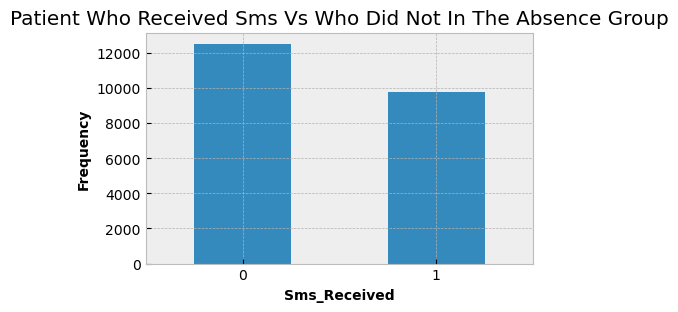

In [87]:
#Python: user defined functions
def mycountplot(df,SMS_received,No_show):
    
    df_absence[SMS_received].value_counts().plot(kind='bar',figsize=(5,3),title='patient who received SMS Vs who did not in the absence group'.title(),rot=0)
   
    plt.xlabel('SMS_received'.title(),fontsize=10,weight="bold")
    plt.ylabel('frequency'.title(),fontsize=10,weight="bold")
    plt.show()
mycountplot('df', 'SMS_received', 'No_show')

### Research Question 2  (Dose patient age and having comorbidities affect compliance?)

Text(0, 0.5, 'Diabetes')

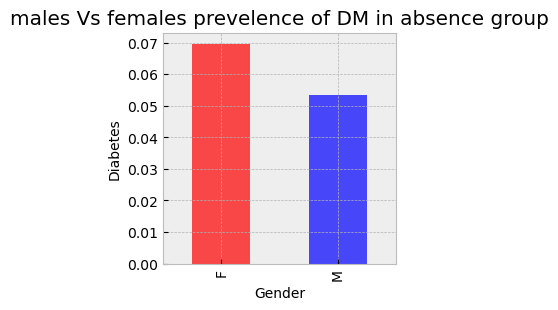

In [27]:
colors = ['red', 'blue']
df_absence.groupby('Gender')['Diabetes'].mean().plot(kind='bar',figsize=(3,3), title='males Vs females prevelence of DM in absence group', color=colors, alpha=.7);
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Diabetes', fontsize=10)

In [28]:
df_absence.groupby('Gender').mean().Diabetes,df_showed.groupby('Gender').mean().Diabetes

(Gender
 F    0.069686
 M    0.053463
 Name: Diabetes, dtype: float64,
 Gender
 F    0.080163
 M    0.062141
 Name: Diabetes, dtype: float64)

In [29]:
df_absence.groupby('Gender').mean(),df_showed.groupby('Gender').mean()

(             Age  Scholarship  Hypertension  Diabetes  Alcoholism   Handcap  \
 Gender                                                                        
 F       36.16219     0.144306      0.182061  0.069686    0.021105  0.018569   
 M       30.83301     0.061100      0.144337  0.053463    0.047767  0.023560   
 
         SMS_received  
 Gender                
 F           0.460463  
 M           0.396634  ,
               Age  Scholarship  Hypertension  Diabetes  Alcoholism   Handcap  \
 Gender                                                                         
 F       39.590417     0.117860      0.221535  0.080163    0.015984  0.019792   
 M       34.461372     0.049609      0.172696  0.062141    0.057102  0.028196   
 
         SMS_received  
 Gender                
 F           0.305384  
 M           0.265358  )

<Compairing the mean distribuation of comorbidities and age throughout patients who showed and who was abcent
<<There was no diiference in patient compliace regurding comorbidities prevelance 
<<But pateints in absence group showed to be Younger than who showed 
<< Female patient in the abscence group tend to be of higher prevelence of (Diabetes, Hypertention and Alcoholism) than men

In [30]:
handcapped=df_showed.query('Handcap ==1')
non_handcapped=df_showed.query('Handcap==0')
num_samples=df.shape[0]
num_samples==handcapped['No_show'].count()+non_handcapped['No_show'].count()

False

In [31]:
handcapped.No_show.count(),non_handcapped.No_show.count()

(1676, 86374)

In [32]:
handcapped=df_absence.query('Handcap ==1')
non_handcapped=df_absence.query('Handcap==0')
num_samples=df_absence.shape[0]
num_samples==handcapped['No_show'].count()+non_handcapped['No_show'].count()

False

In [33]:
handcapped.No_show.count(),non_handcapped.No_show.count()

(366, 21912)

>The Bar chart comparing candcapped patients who didn't show (Absence) and (showed)patient. 
>From the whole number there was (1676 handcapped , 86374 Non_handcapped) who showed and from the Absence group(366 handcapped , 21912 Non_handcapped), So the handcapped who showed was more than the Absence. 

Text(0, 0.5, 'patients number')

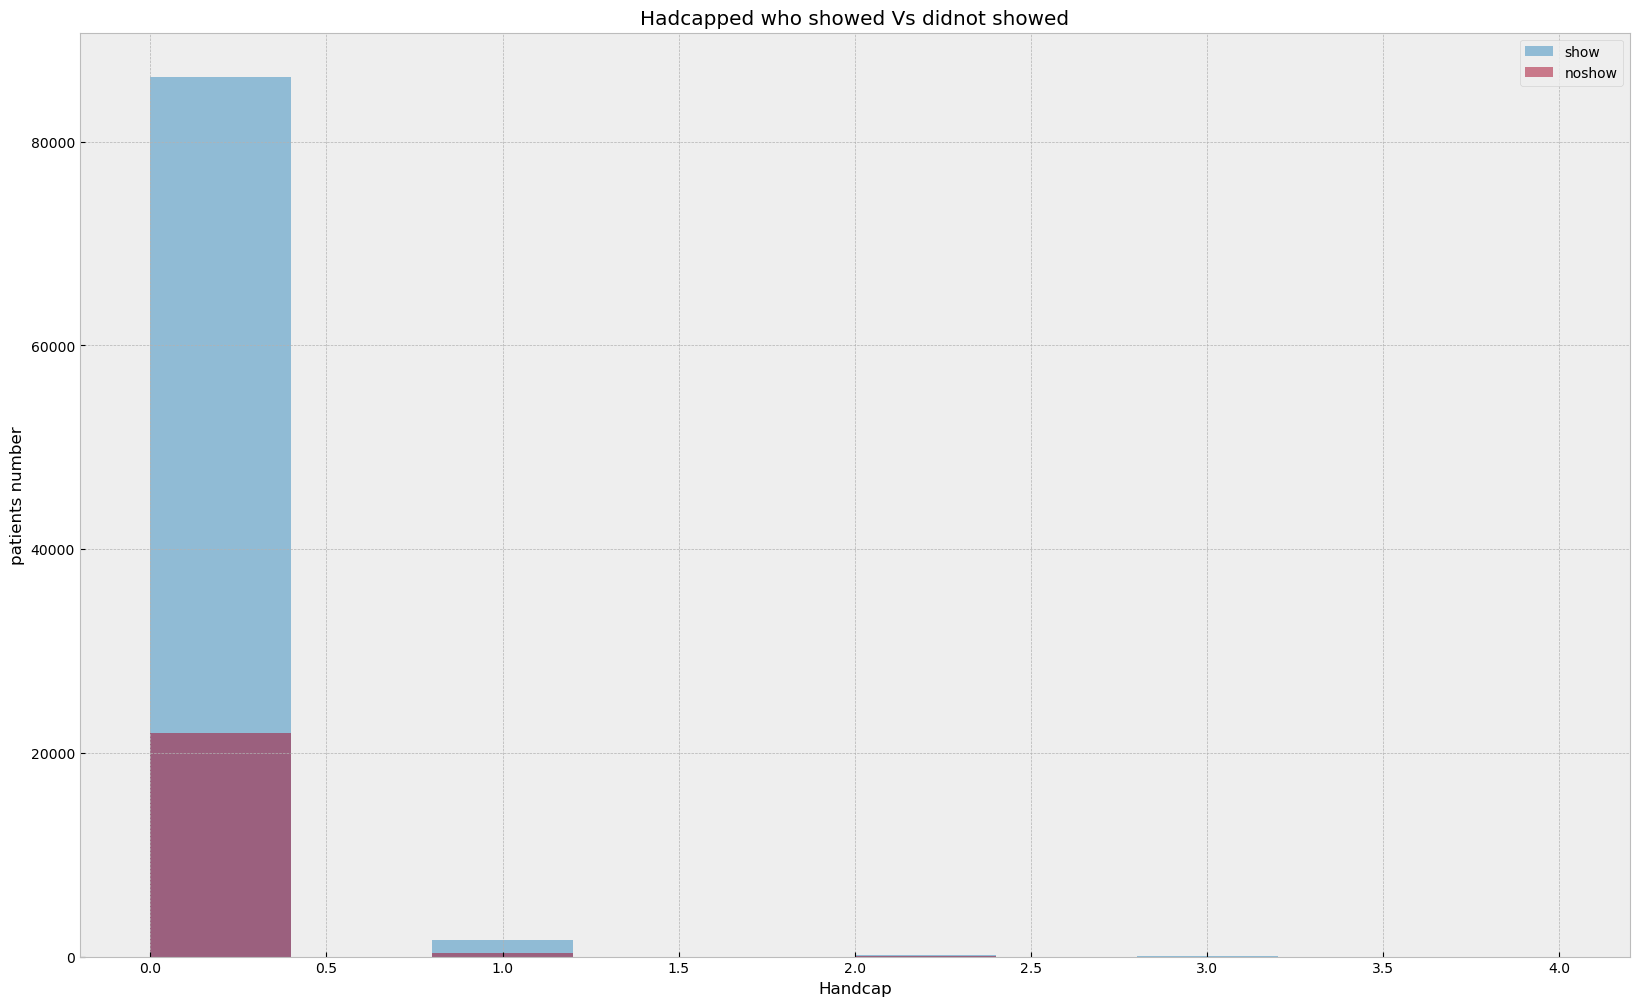

In [34]:
plt.figure(figsize=[20,12])
df_showed.Handcap.hist(alpha=0.5,label='show')
df_absence.Handcap.hist(alpha=0.5,label='noshow')
plt.legend()
plt.title('Hadcapped who showed Vs didnot showed')
plt.xlabel('Handcap')
plt.ylabel('patients number')

<a id='conclusions'></a>
## Conclusions
>#1- Patients who did't receive the SMS massages were more likely to miss there opointment (abscence)

>#2- The correlation between nighbourhood places and patient complience showed that the most popular places 
were more likely to have more absence and vice versa the less popular had also less absence
data reguarding this factor may need farther investigation 
 

>#3 timing of the schedualed visits had in impact in ppatient compliance 
that factor can be consedered when putting a schedual for patient with important follow ups and life saving issues

>#4 Comorbidities as diabetes, hypertention and being handcapped were not an issue 
causing a cleint or patient to miss his follow up 

>#5 There was not ether a correlation between age and patient compliance
>Male patients was almost double that of the females, we found no correlation bettween gender and compliance

> Limitation:  the limitations of my exploration: in my openion additional factors probably will impact patient compliance besides facility place in the patient him seilf home location considering how far is the facility from patient home will give us idea about an imprtant cause for patient abscence.


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295